In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Разведочный анализ данных (EDA) - анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации. 
Концепция EDA разработана американским математиком Джоном Тьюки еще в 1970-х годах, и до сих пор является важным этапом аналитических работа.

Джон Тьюки выделял следующие цели EDA:

* максимальное «проникновение» в данные,

* выявление основных структур,

* выбор наиболее важных переменных,

* обнаружение отклонений и аномалий,

* проверка основных гипотез,

* разработка начальных моделей.

In [2]:
df_salary = pd.read_csv('/Users/shu/netology/files_from_netology/files_for_visualization_data/salary_dataset.csv')

In [3]:
df_salary = df_salary.drop(['Unnamed: 0'], axis=1)
df_salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [4]:
df_salary.shape

(6704, 8)

In [5]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [6]:
df_salary.Gender.value_counts() # Колличество данных в столбце Пол по категориям, есть ОНИ!

Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64

In [7]:
df_salary.isna().mean().round(5) * 100 # Смотрим пропущенные данные

Age                    0.030
Gender                 0.030
Education Level        0.045
Job Title              0.030
Years of Experience    0.045
Salary                 0.075
Country                0.000
Race                   0.000
dtype: float64

В датасете непрерывные значение - это только зарплата сотрудников. Все остальные значения категориальные. Также есть столбцы 'Age', 'Years of Experience' в которых тип данных float, проверим эти столбцы на корректность заполнения данных в датасете. Поэтому Найдем выбросы в столбцах 'Age', 'Years of Experience' и 'Salary'. 

In [8]:
df_salary.describe() # рассчитываем базовые статистики в датафрейме

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [9]:
# Находим моду


print(df_salary.Age.mode()[0])
print()
print(df_salary.Salary.mode()[0])
print()
print(df_salary['Years of Experience'].mode()[0])

27.0

140000.0

2.0


In [10]:
c = ['Age', 'Years of Experience', 'Salary']
df_w_col = df_salary[c]

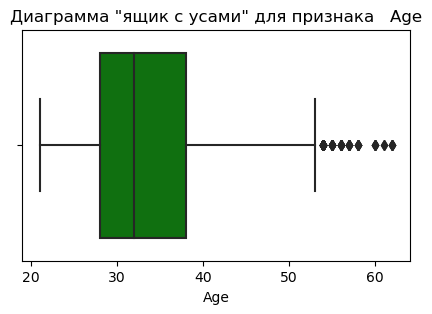

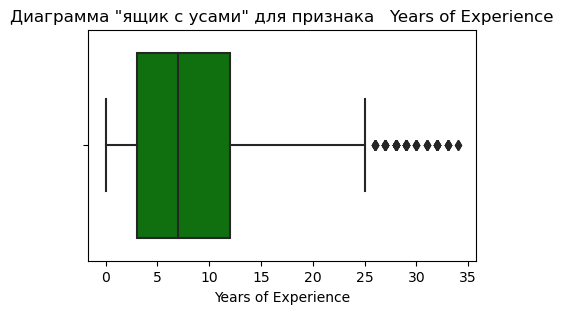

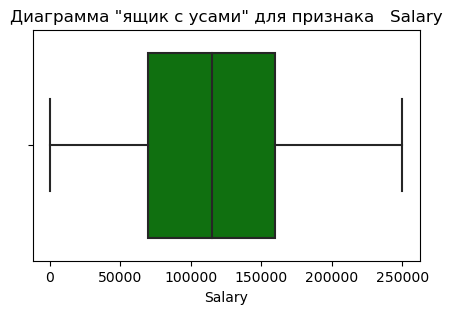

In [11]:
# Смотрим выбросы. 
# 

for col in c:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df_w_col, x=col, color='green')
    plt.title('Диаграмма "ящик с усами" для признака   ' + col)
    plt.show()

In [12]:
# Вычисляем корреляцию
# Есть сильная зависимость опыта работы и зарплаты

df_salary.corr()

/var/folders/ks/bqxz1yvx2mjcsnh9lynjm30c0000gn/T/ipykernel_92658/2558462058.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_salary.corr()


,Age,Years of Experience,Salary
Age,1.000000,0.937655,0.728053
Years of Experience,0.937655,1.000000,0.808969
Salary,0.728053,0.808969,1.000000


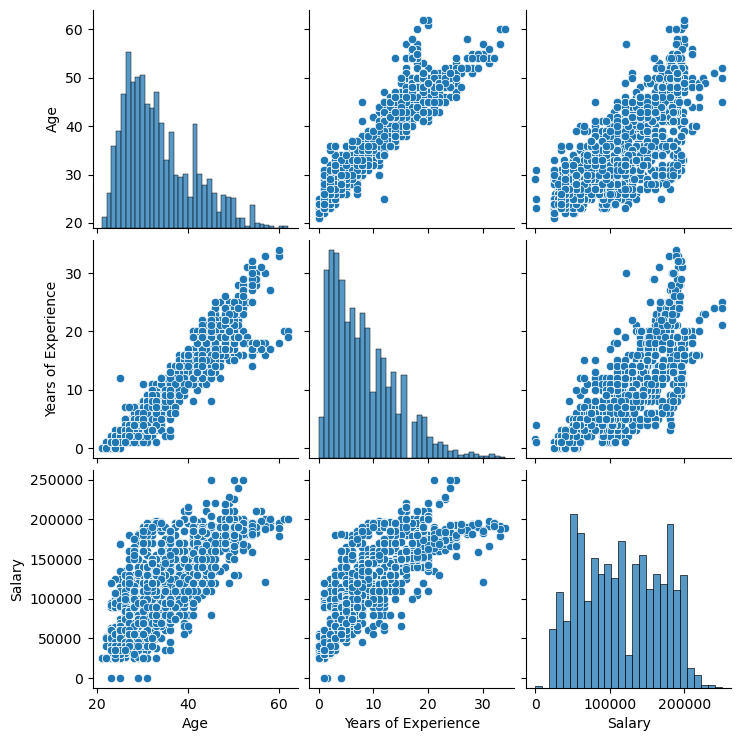

In [13]:
# Смотрим на корреляцию в данных
# Видим на графиках, что от возраста/опыта работы в компании зарплата выше

sns.pairplot(df_salary)

In [14]:
man = df_salary.query("Gender == 'Male'")['Salary']
woman = df_salary.query("Gender == 'Female'")['Salary']
man_age = df_salary.query("Gender == 'Male'")['Age']
woman_age = df_salary.query("Gender == 'Female'")['Age']
other = df_salary.query("Gender == 'Other'")['Salary']
other_age = df_salary.query("Gender == 'Other'")['Age']

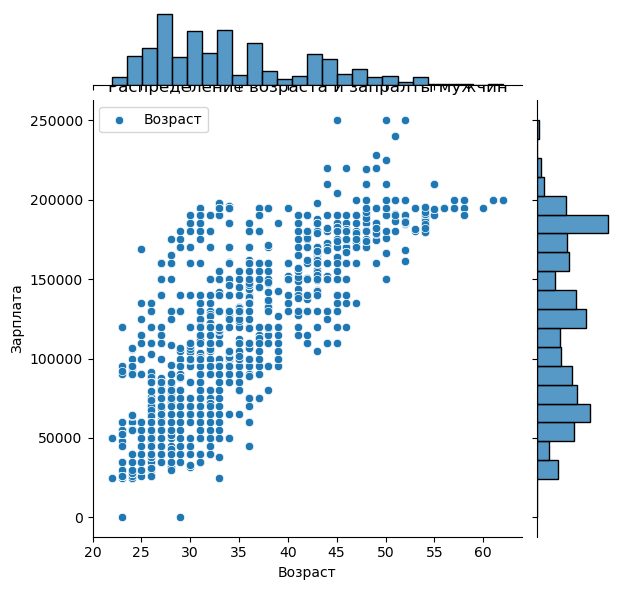

In [15]:
# Определяем возраст и зарплату муж в компании 
# Видим хорошую зависимость зарплаты от возраста и не нормальное распределение

sns.jointplot(x=man_age, y=man, data=df_w_col)

plt.title('Распределение возраста и запралты мужчин')
plt.xlabel('Возраст')
plt.ylabel('Зарплата')
plt.legend(['Возраст'], loc=2)
plt.show()

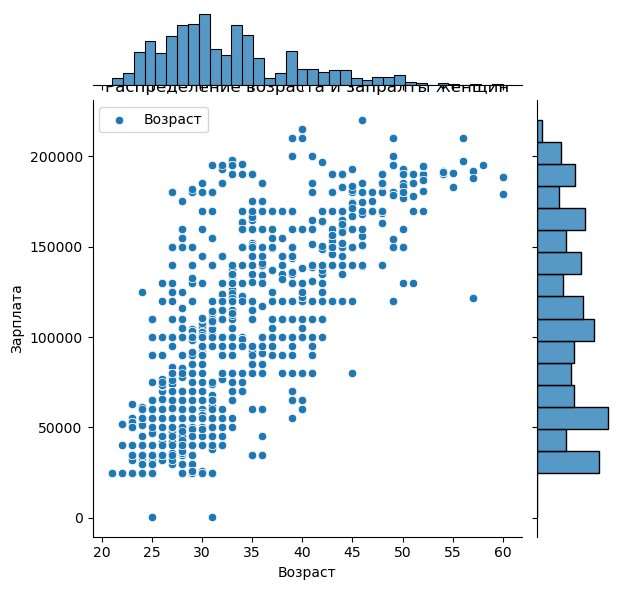

In [16]:
# Определяем возраст и зарплату жен в компании 
# Видим хорошую зависимость зарплаты от возраста и не нормальное распределение

sns.jointplot(x=woman_age, y=woman, data=df_w_col)
plt.title('Распределение возраста и запралты женщин')
plt.xlabel('Возраст')
plt.ylabel('Зарплата')
plt.legend(['Возраст'], loc=2)
plt.show()

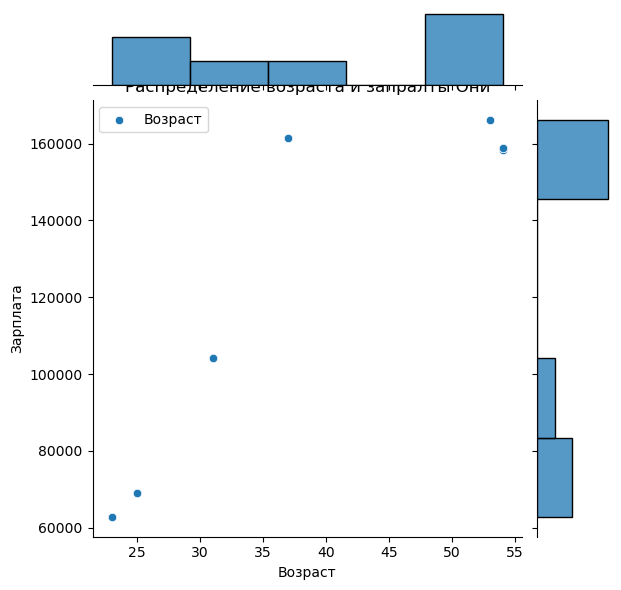

In [17]:
# Определяем возраст и зарплату Они! в компании 
# Данных мало. Сделать выводы не возможно

sns.jointplot(x=other_age, y=other, data=df_w_col)
plt.title('Распределение возраста и запралты Они')
plt.xlabel('Возраст')
plt.ylabel('Зарплата')
plt.legend(['Возраст'])
plt.show()

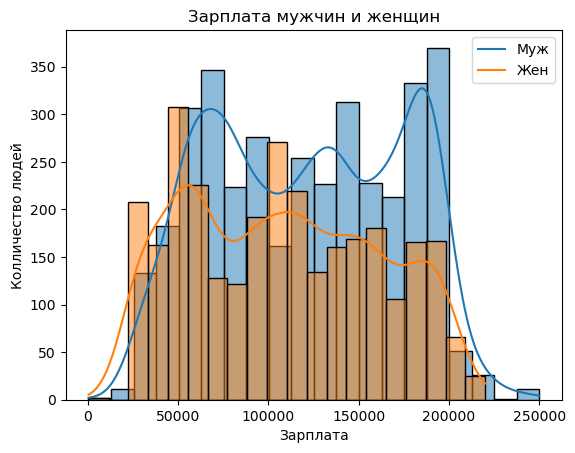

In [41]:
# Если сравнить зарплаты муж и жен, то на графике видно, что у мужчины зарплата выше 

sns.histplot(man, kde=True, bins=20)
sns.histplot(woman, kde=True, bins=20)
plt.title('Зарплата мужчин и женщин')
plt.xlabel('Зарплата')
plt.ylabel('Колличество людей')
plt.legend(['Муж', 'Жен'])
plt.show()

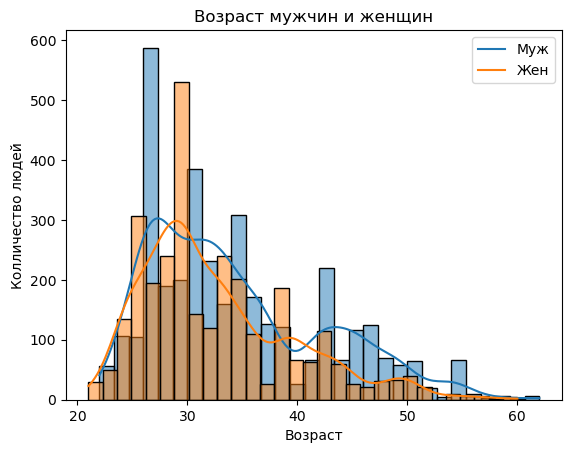

In [138]:
# Рабочий возраст выше у муж

sns.histplot(man_age, kde=True, bins=30)
sns.histplot(woman_age, kde=True, bins=30)
plt.title('Возраст мужчин и женщин')
plt.xlabel('Возраст')
plt.ylabel('Колличество людей')
plt.legend(['Муж', 'Жен'])
plt.show()